### Nombre: Matías Jesús Egaña Alfaro. 
### Rut: 20.457.413-8. 
### Profesor: Humberto Farias Aroca.

### Desafíos 

Para profundizar su comprensión sobre cómo los diferentes parámetros y configuraciones afectan el rendimiento del modelo, complete los siguientes desafíos:

#### Desafío 4: Modificar la Función de Activación en las Capas Ocultas

El modelo actual utiliza la función de activación ReLU en las capas ocultas. Intente usar una función de activación diferente y observe cómo afecta el rendimiento del modelo.

1. Cambie la función de activación a `sigmoid`:


2. Cambie la función de activación a `tanh`:


**Pregunta:**
- ¿Cómo afectan las diferentes funciones de activación en las capas ocultas a la precisión y la pérdida del modelo durante el entrenamiento y la validación?

In [27]:
!pip install tensorflow

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


In [29]:
# Configuración para mostrar gráficos en Jupyter Notebook
%matplotlib inline

In [30]:
# Cargar el conjunto de datos Iris
data = load_iris()
X = data.data
y = data.target


In [31]:
# Convertir las etiquetas a formato one-hot encoding
y = to_categorical(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Introducción al Perceptrón Multicapa (MLP)
El Perceptrón Multicapa (MLP) es un tipo de red neuronal artificial que consiste en múltiples capas de neuronas, conectadas de manera que cada neurona de una capa está conectada a todas las neuronas de la siguiente capa. Estas capas son típicamente:

1. **Capa de Entrada:** Recibe las características del conjunto de datos.
2. **Capas Ocultas:** Procesan las características mediante la aplicación de funciones de activación.
3. **Capa de Salida:** Proporciona el resultado final de la red, que puede ser una clasificación, una regresión, etc.

## Arquitectura del MLP

1. **Capa de Entrada:** En nuestro caso, esta capa tendrá 4 neuronas, correspondientes a las 4 características del conjunto de datos Iris.
2. **Capas Ocultas:** Añadiremos dos capas ocultas con 10 neuronas cada una y una función de activación ReLU.
3. **Capa de Salida:** Tendrá 3 neuronas, correspondientes a las 3 clases del conjunto de datos Iris, con una función de activación softmax para la clasificación.

## Función de Activación Sigmoid

La función de activación Sigmoid es una función de activación clásica utilizada en las redes neuronales, especialmente útil en las capas de salida de modelos de clasificación binaria. La ecuación del Sigmoid es:

$$
\text{Sigmoid}(x) = \frac{1}{1 + e^{-x}}
$$

Esto implica que:

- La salida de la función Sigmoid está siempre en el rango de 0 a 1, lo que la hace ideal para problemas donde necesitamos estimar probabilidades.
- A medida que el valor de entrada $x$ se hace muy grande o muy pequeño, la salida se aplana cerca de los valores de 1 o 0 respectivamente, lo que puede llevar a problemas de gradientes que desaparecen durante el entrenamiento de la red.

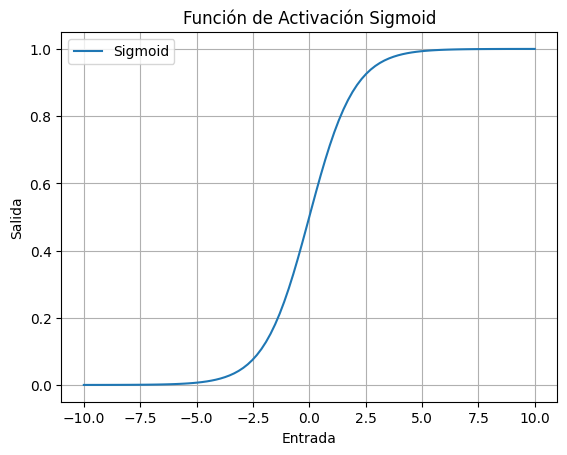

In [32]:
# Definición de la función Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generar datos para la gráfica
x = np.linspace(-10, 10, 100)
y_sigmoid = sigmoid(x)

# Graficar la función Sigmoid
plt.plot(x, y_sigmoid, label='Sigmoid')
plt.title('Función de Activación Sigmoid')
plt.xlabel('Entrada')
plt.ylabel('Salida')
plt.legend()
plt.grid()
plt.show()

## Construcción del modelo

In [33]:
# Crear el modelo MLP
model = Sequential()
model.add(Dense(10, input_dim=4, activation='sigmoid'))  # Capa de entrada con 10 neuronas y función de activación ReLU
model.add(Dense(10, activation='sigmoid'))  # Capa oculta con 10 neuronas y función de activación ReLU
model.add(Dense(3, activation='softmax'))  # Capa de salida con 3 neuronas (una por clase) y función de activación softmax

# Resumen del modelo
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

## Función de Pérdida `categorical_crossentropy`
La función de pérdida `categorical_crossentropy` se utiliza para problemas de clasificación multiclase. Mide la discrepancia entre dos distribuciones de probabilidad: la distribución real (etiquetas verdaderas) y la distribución predicha por el modelo. La ecuación es:

$$
\text{Categorical Crossentropy} = -\sum_{i=1}^{N} y_i \log(\hat{y}_i)
$$

Donde:
- $y_i$ es la etiqueta verdadera para la clase $i$.
- $\hat{y}_i$ es la probabilidad predicha por el modelo para la clase $i$.
- $N$ es el número total de clases.

La función de pérdida es mínima cuando las distribuciones real y predicha son idénticas, lo que significa que el modelo ha hecho predicciones perfectas.

### Gráfico de la Función de Pérdida `categorical_crossentropy`

Para visualizar cómo cambia la pérdida `categorical_crossentropy`, podemos graficar la pérdida en función de las probabilidades predichas para un conjunto de etiquetas verdaderas.


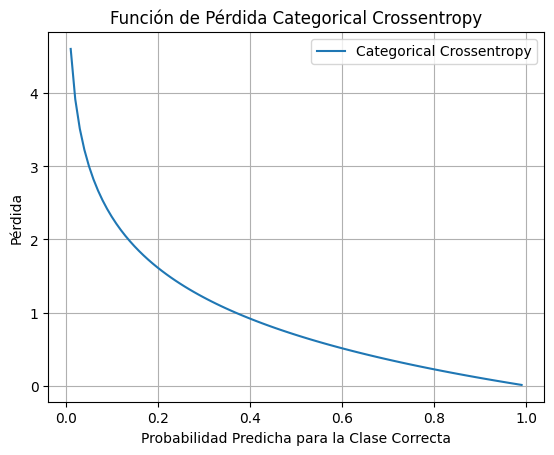

In [34]:

# Definición de la función de pérdida categorical_crossentropy
def categorical_crossentropy(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred))

# Generar datos para la gráfica
y_true = np.array([0, 0, 1])  # Etiqueta verdadera (one-hot encoding)
y_pred = np.linspace(0.01, 0.99, 100)  # Probabilidades predichas (varían de 0.01 a 0.99)
loss = [categorical_crossentropy(y_true, [1 - p - 0.01, 0.01, p]) for p in y_pred]

# Graficar la función de pérdida categorical_crossentropy
plt.plot(y_pred, loss, label='Categorical Crossentropy')
plt.title('Función de Pérdida Categorical Crossentropy')
plt.xlabel('Probabilidad Predicha para la Clase Correcta')
plt.ylabel('Pérdida')
plt.legend()
plt.grid()
plt.show()

## Entrenamiento del Modelo

Entrenaremos el modelo utilizando los datos de entrenamiento. Especificamos el número de épocas y el tamaño del lote, además de una porción de datos para validación durante el entrenamiento.



In [35]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3952 - loss: 1.1064 - val_accuracy: 0.4167 - val_loss: 1.0675
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2972 - loss: 1.1147 - val_accuracy: 0.4167 - val_loss: 1.0717
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3870 - loss: 1.0970 - val_accuracy: 0.4167 - val_loss: 1.0786
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3893 - loss: 1.0917 - val_accuracy: 0.4167 - val_loss: 1.0813
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4225 - loss: 1.0903 - val_accuracy: 0.7500 - val_loss: 1.0829
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5664 - loss: 1.0849 - val_accuracy: 0.8333 - val_loss: 1.0785
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5380 - loss: 1.0803 - val_accuracy: 0.8333 - val_loss: 1.0749
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6778 - loss: 1.0742 - val_accuracy: 0.8333 - val_loss

In [37]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 1.0000 - loss: 0.5090
Precisión en el conjunto de prueba: 100.00%


In [38]:
# Guardar el modelo
model.save('mlp_model_FA_sigmoid.h5')

# Cargar el modelo
from tensorflow.keras.models import load_model
model = load_model('mlp_model_FA_sigmoid.h5')


## Visualización de Resultados

Visualizamos la precisión y la pérdida durante el entrenamiento para entender mejor el rendimiento del modelo.


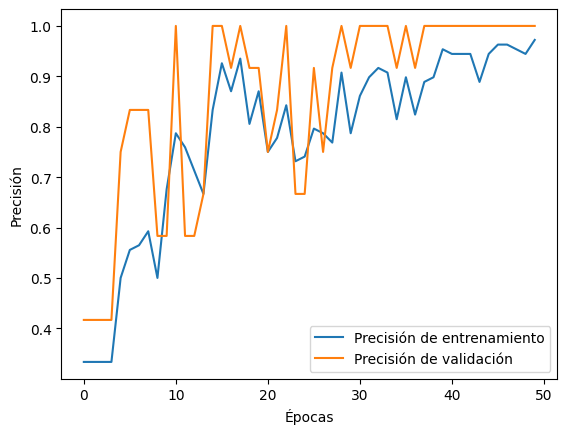

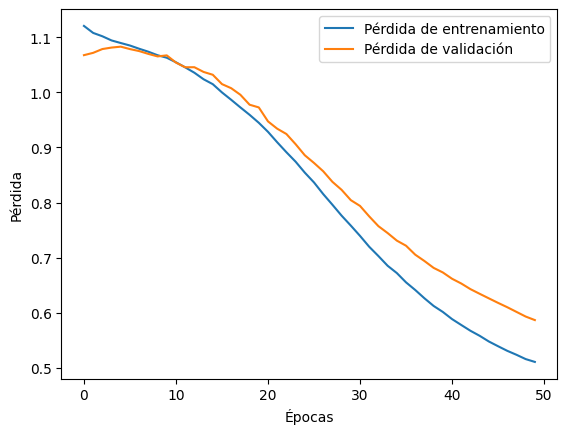

In [39]:
# Graficar la precisión
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


#### ¿Cómo afectan las diferentes funciones de activación en las capas ocultas a la precisión y la pérdida del modelo durante el entrenamiento y la validación?
- Sigmoid y Tanh: Estas funciones pueden introducir no linealidades más suaves comparadas con ReLU, pero tienden a ser menos efectivas en capas profundas debido al problema de los gradientes que desaparecen. En entrenamiento y validación, esto puede manifestarse como un entrenamiento más lento y menos efectivo, especialmente en redes profundas, afectando negativamente tanto la precisión como la pérdida.